# Task 3. 

Install SHAP (https://github.com/slundberg/shap) and XGBoost (pip install xgboost) to your environment, Go through the Tree ensemble example for Boston housing dataset (https://github.com/slundberg/shap and https://mljar.com/blog/feature-importance-xgboost/), to calculate feature importance for both  training set and the test set, and  submit one jupyter notebook tutorial for using XGBoost and SHAP to analyze the Boston housing dataset (HW10c.ipynb, 20 Points).

### install SHAP and XGBoost

### Tree Ensemble Example Tutorial with SHAP and XGBoost

In [2]:
import xgboost
import shap

I am fetching the data from the original source, but it should be noted that the boston housing prices dataset has been deprecated and removed from scikit-learn version 1.2 due to ethical concerns.

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


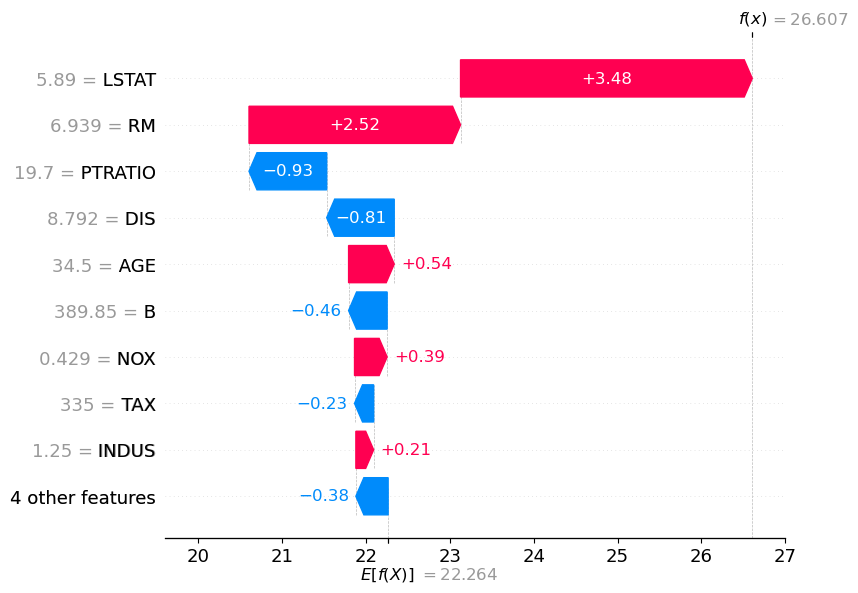

In [67]:
# import and split data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
feature_names = ['CRIM', 'AN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X_train, y_train)

# use shapely values to explain predictions on the training set
explainer = shap.Explainer(model, feature_names=feature_names)
shap_values = explainer(X_train)

# visualize the explanation of the first prediction
shap.plots.waterfall(shap_values[0])

The waterfall plot shows features contributing to push the model output out from the base value. Features which contribute to a higher prediction are shown in red when features which contribute to a lower prediction are shown in blue.

This same information can be vizualized with a force plot:

In [68]:
# visualize the first prediction's explanation with a force plot
shap.initjs() # load js library needed for visualization
shap.plots.force(shap_values[0])

We can see explanations for the entire dataset:

In [69]:
# visualize all the training set predictions
shap.plots.force(shap_values)

The effect of a single feature on the output of the model can be seen by plotting the SHAP value of that feature against the value of the feature for all examples in the dataset:

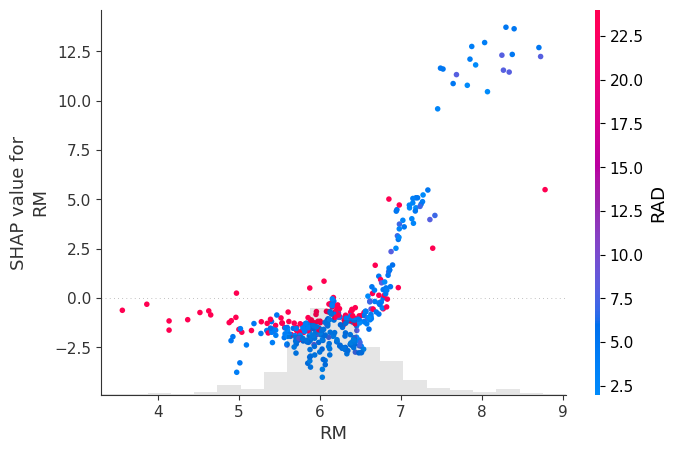

In [70]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "RM"], color=shap_values)

To get an overview of which features are most important for the model we can plot the SHAP values of every feature for every sample. Features in the plot below are sorted by the sum of SHAP value magnitudes over all samples. SHAP values show the distribution of the impacts that each feature has on the model output:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


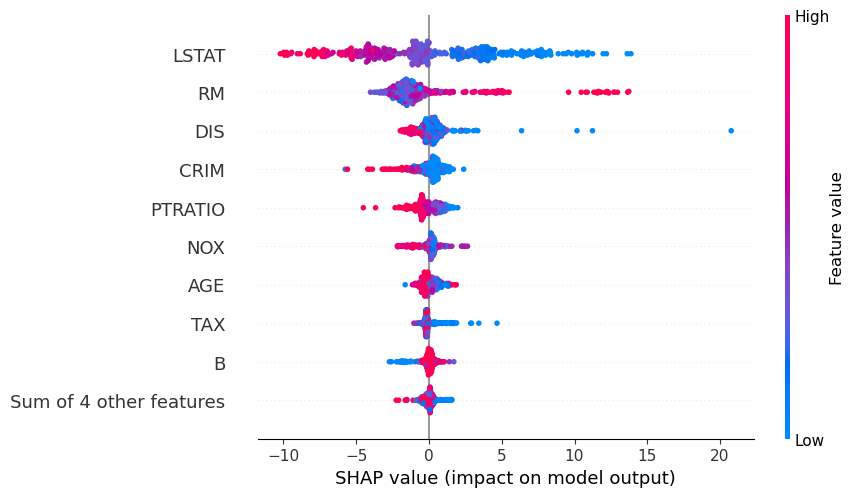

In [71]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

By taking the mean absolute value of the SHAP values for each fetaure, we can get a standard bar plot:

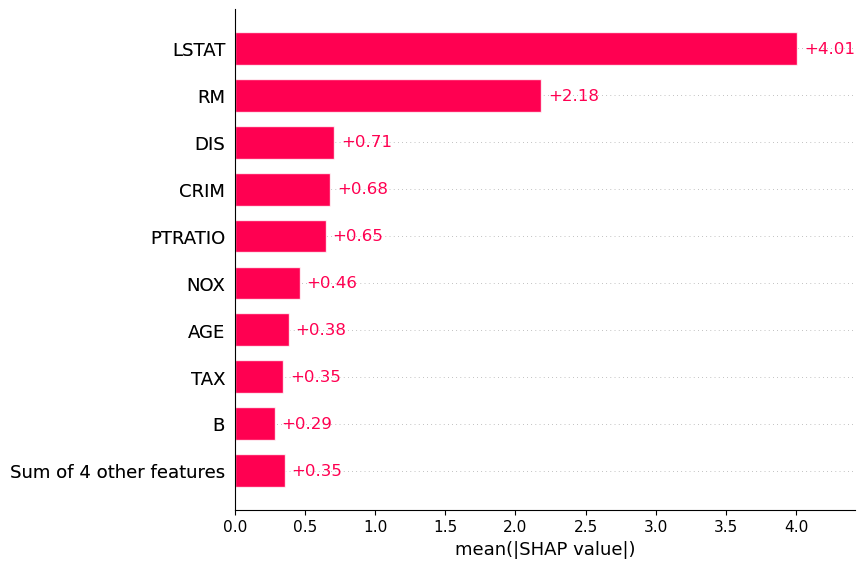

In [72]:
shap.plots.bar(shap_values)

### Test set feature importance

In [73]:
# use shapely values to explain predictions on the test set
shap_values = explainer(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [74]:
# visualize all the training set predictions
shap.plots.force(shap_values)

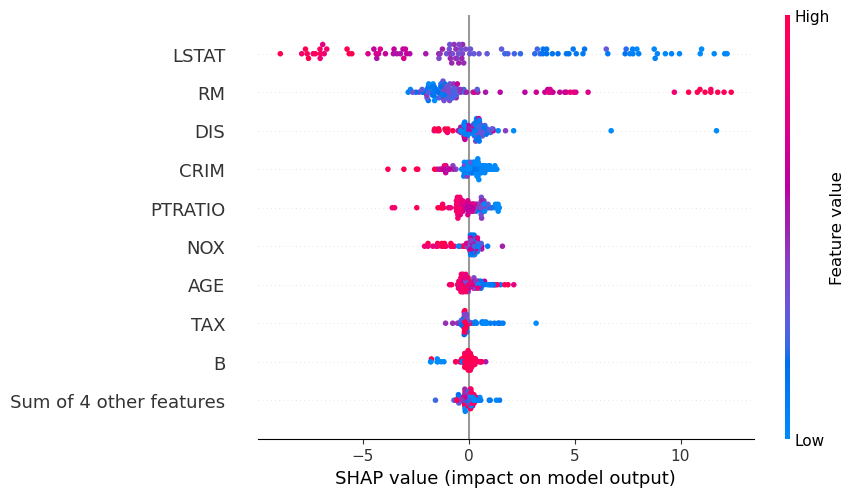

In [75]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

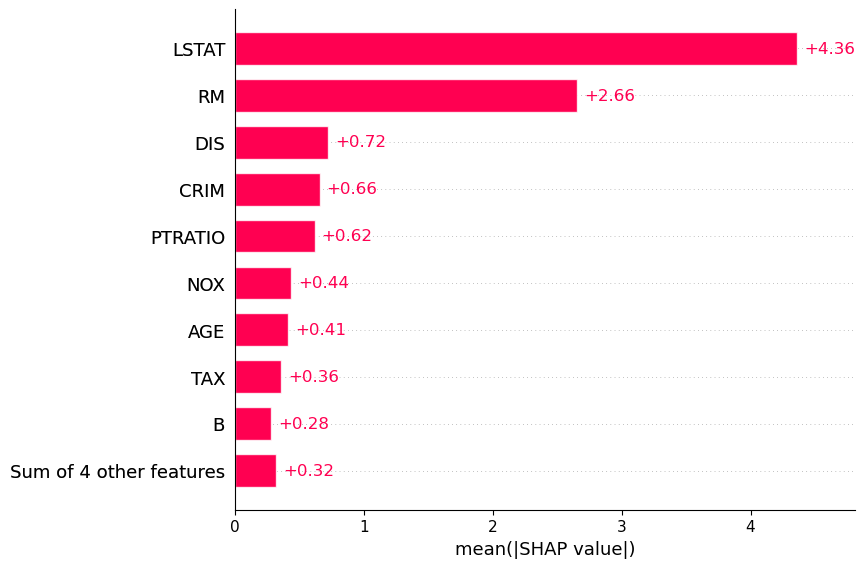

In [76]:
shap.plots.bar(shap_values)

We see similar feature importance between the training set and test set.